# Gender Classification using Natural Language Processing on OkCupid dataset

In this notebook we explore a data set containing around 60,000 OKCupid profiles and see if we can identify trends in how users of different genders express themselves based on their responses to open text fields within the app such as *About Me*, *Current Goals*, *My Golden Rule*, etc .. 

There are 10 `essay` columns in this dataset and they relate to open text fields within the app. They are not necessarily in order, so any essay column could have any of the following open text fields: *About Me / Self summary, Current Goals / Aspirations, My Golden Rule / My traits, I could probably beat you at / Talent, The last show I binged / Hobbies, A perfect day / Moments, I value / Needs, The most private thing I'm willing to admit / Secrets, What I'm actually looking for / Dating.*

Details on the data set and where to find it can be found in the appendix at the end of this notebook.

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('profiles.csv')
data.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


### Exploring trends in responses to open text fields by gender - words and bigrams

#### Let us find the 10 most common words used by men and women
We first create a new column concatenating all 10 `essay` columns, and drop any lines where this new value is empty. We can see in the first two lines of the data set above that the text in the `essay` field contains `html` tags. We are going to use BeautifulSoup to remove these tags.

The output of the next cell shows the cleansed data in column `essays` as well as a new column `sex_num` containing a numerical value for gender.

In [3]:
data['raw_essays'] = data['essay0'] + " " + data['essay1'] + " " + data['essay2'] + " " + data['essay3'] + " " + data['essay4'] + " " + data['essay5'] + " " + data['essay6'] + " " + data['essay7'] + " " + data['essay8'] + " " + data['essay9']
data['sex_num'] = data['sex'].map({'m' : 0, 'f' : 1})

data = data.dropna(subset = ['raw_essays'])

from bs4 import BeautifulSoup
data['essays'] = data['raw_essays'].apply(lambda x: BeautifulSoup(x).text)


data[['essay0', 'essay1', 'essay2', 'raw_essays', 'essays', 'sex', 'sex_num']].head()

,essay0,essay1,essay2,raw_essays,essays,sex,sex_num
0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,about me:<br />\n<br />\ni would love to think...,about me:\n\ni would love to think that i was ...,m,0
5,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,"i'm an australian living in san francisco, but...","i'm an australian living in san francisco, but...",m,0
9,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,my names jake.<br />\ni'm a creative guy and i...,my names jake.\ni'm a creative guy and i look ...,m,0
10,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...","update: i'm seeing someone, so off the market ...","update: i'm seeing someone, so off the market ...",m,0
11,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"i was born in wisconsin, grew up in iowa, and ...","i was born in wisconsin, grew up in iowa, and ...",m,0


We will then use a CountVectorizer object to identify the 10 most common words for each men and women.

In [4]:
m_data = data[data['sex_num'] == 0]
m_corpus = m_data['essays']

m_vectorizer = CountVectorizer(stop_words = 'english')
X = m_vectorizer.fit_transform(m_corpus)

m_freq_dict = {}
freq_sum = X.sum(axis = 0)
for i, feature in enumerate(m_vectorizer.get_feature_names()):
    m_freq_dict[feature] = freq_sum.item(i)
    
top_10_words_m = sorted(m_freq_dict.items(), key = lambda x: x[1], reverse = True)[:10]
print(top_10_words_m)

[('like', 54543), ('love', 37990), ('good', 34721), ('music', 32909), ('people', 30881), ('friends', 28681), ('just', 27814), ('time', 27285), ('life', 27114), ('things', 25225)]


In [5]:
f_data = data[data['sex_num'] == 1]
f_corpus = f_data['essays']

f_vectorizer = CountVectorizer(stop_words = 'english')
X = f_vectorizer.fit_transform(f_corpus)

f_freq_dict = {}
freq_sum = X.sum(axis = 0)
for i, feature in enumerate(f_vectorizer.get_feature_names()):
    f_freq_dict[feature] = freq_sum.item(i)
    
top_10_words_f = sorted(f_freq_dict.items(), key = lambda x: x[1], reverse = True)[:10]
print(top_10_words_f)

[('love', 38895), ('like', 35353), ('good', 22772), ('friends', 22001), ('people', 21632), ('music', 21001), ('life', 20203), ('time', 18754), ('things', 17312), ('just', 17115)]


It seems like both men and women tend to use the same top 10 words in their dating app profiles: however, the frequencies at which they use each word are different between men and women.

- "Love" and "Like" are the top 2 words for both, however, women seem to use the word "love" more whereas men prefer "Like"
- "Like" is by far the most frequently used word by men
- Women mention more frequently "life", "friends" and "people"

Let's built a bar plot to visualise this. First, we will need to normalize our numbers so we can compare the different figures as the dataset contains more men than women.

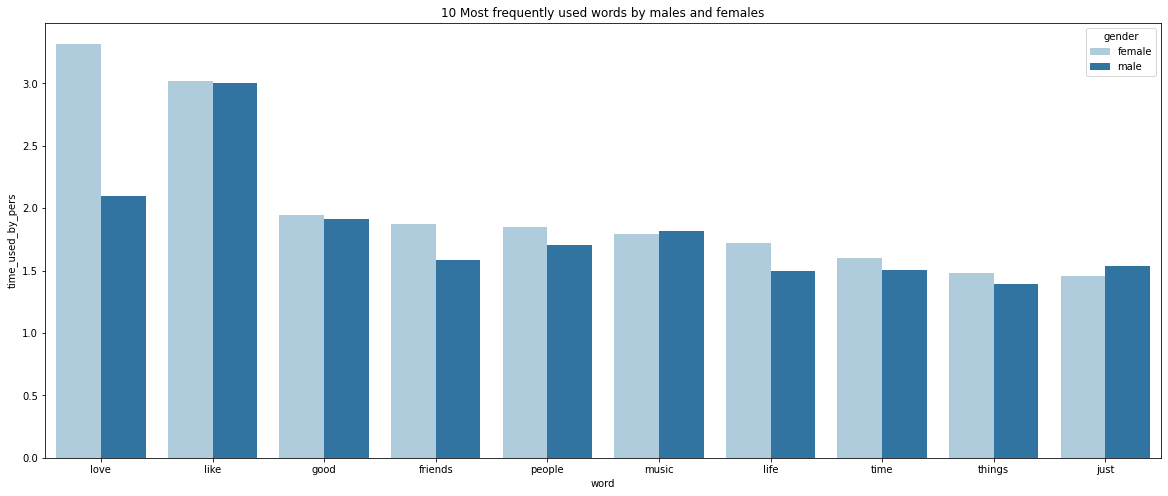

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_df = pd.concat([pd.DataFrame(([x, y, 'female'] for (x, y) in top_10_words_f)) , pd.DataFrame([x, y, 'male'] for (x, y) in top_10_words_m)])
top_10_df.rename(columns = {0 : "word", 1 : "times_used", 2 : "gender"}, inplace = True)

num_women = data['sex_num'].value_counts()[1]
num_men = data['sex_num'].value_counts()[0]

top_10_df["time_used_by_pers"] = top_10_df.apply(lambda row : (row["times_used"]/num_women) if (row["gender"] == "female") else (row["times_used"]/num_men), axis = 1)

plt.figure(figsize = (20, 8))
sns.set_palette("Paired")
sns.barplot(data = top_10_df, x = top_10_df["word"], y = top_10_df["time_used_by_pers"], hue = top_10_df["gender"])
plt.title("10 most frequently used words by males and females")
plt.show()


#### Now let us find the 10 most common bigrams used by men and women
We will use a CountVectorizer object to identify the 10 most common bigrams in open text responses from both men and women.

In [7]:
m_vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))
X = m_vectorizer.fit_transform(m_corpus)

m_freq_dict = {}
freq_sum = X.sum(axis = 0)
for i, feature in enumerate(m_vectorizer.get_feature_names()):
    m_freq_dict[feature] = freq_sum.item(i)
    
top_10_bigrams_m = sorted(m_freq_dict.items(), key = lambda x: x[1], reverse = True)[:10]
print(top_10_bigrams_m)

[('san francisco', 4406), ('bay area', 3508), ('family friends', 3193), ('sense humor', 3097), ('friends family', 2760), ('really good', 2352), ('don know', 2340), ('new things', 2314), ('hip hop', 1982), ('making people', 1891)]


In [8]:
f_vectorizer = CountVectorizer(stop_words = 'english', ngram_range = (2, 2))
X = f_vectorizer.fit_transform(f_corpus)

f_freq_dict = {}
freq_sum = X.sum(axis = 0)
for i, feature in enumerate(f_vectorizer.get_feature_names()):
    f_freq_dict[feature] = freq_sum.item(i)
    
top_10_bigrams_f = sorted(f_freq_dict.items(), key = lambda x: x[1], reverse = True)[:10]
print(top_10_bigrams_f)

[('family friends', 2977), ('san francisco', 2567), ('friends family', 2546), ('bay area', 2392), ('sense humor', 2313), ('new things', 1845), ('really good', 1599), ('don know', 1409), ('making people', 1370), ('trying new', 1263)]


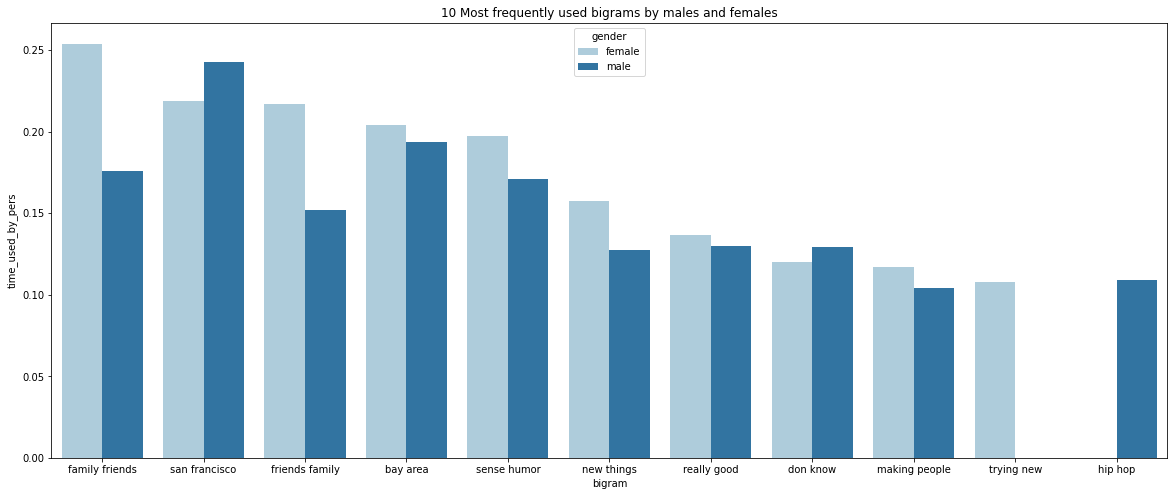

In [9]:
top_10_bigrams_df = pd.concat([pd.DataFrame(([x, y, 'female'] for (x, y) in top_10_bigrams_f)) , pd.DataFrame([x, y, 'male'] for (x, y) in top_10_bigrams_m)])
top_10_bigrams_df.rename(columns = {0 : "bigram", 1 : "times_used", 2 : "gender"}, inplace = True)

top_10_bigrams_df["time_used_by_pers"] = top_10_bigrams_df.apply(lambda row : (row["times_used"]/num_women) if (row["gender"] == "female") else (row["times_used"]/num_men), axis = 1)

plt.figure(figsize = (20, 8))
sns.set_palette("Paired")
sns.barplot(data = top_10_bigrams_df, x = top_10_bigrams_df["bigram"], y = top_10_bigrams_df["time_used_by_pers"], hue = top_10_bigrams_df["gender"])
plt.title("10 Most frequently used bigrams by males and females")
plt.show()


### Building a model that predicts a person's gender based on their reponses to open text fields

Now that we've explored the most frequently used words and bigrams in each male and female profiles, we will build a model that classifies profiles by gender based on responses to open text fields. For this, we are going to use a Naive Bayes classifier. Let's first start by using all the text we have in our data set as a corpus to build our features dictionary.

In [10]:
corpus = data['essays']
labels = data['sex_num']

vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus)

We will split our data into a training set and a validation set. 

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size = 0.2)

classifier = MultinomialNB()
classifier.fit(train_data, train_labels)
print("Model's score on the : ")
print(" -  Training data: ", classifier.score(train_data, train_labels))
print(" -  Validation data: ", classifier.score(test_data, test_labels))

Model's score on the : 
 -  Training data:  0.886991461577097
 -  Validation data:  0.7905925677937731


The NB classifier using unigrams scores around 0.79 on the validation data. Let's have a look at the first few features of our model:

In [12]:
vectorizer.get_feature_names()[:10]

['00',
 '000',
 '000000',
 '0000x',
 '0002',
 '000ft',
 '000km',
 '000m',
 '001',
 '003']

#### Improving the model's performance by cleansing the training corpus 
We can see from the above that lots of features of the corpus are words containing digits and/or underscore characters. We cleansed the training data to remove all words that have digits and/or underscores in them.

In [13]:
data['no_digit_essays'] = data['essays'].str.replace('\d|_', '', regex = True)

In [14]:
no_digit_corpus = data['no_digit_essays']

no_digits_vectorizer = CountVectorizer(stop_words = 'english')
X = no_digits_vectorizer.fit_transform(no_digit_corpus)

feature_names = no_digits_vectorizer.get_feature_names()
print("Number of features: ", len(feature_names))

train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size = 0.2)

classifier = MultinomialNB()
classifier.fit(train_data, train_labels)

print("No digits model's score on the : ")
print(" -  Training data: ", classifier.score(train_data, train_labels))
print(" -  Test data: ", classifier.score(test_data, test_labels))

Number of features:  121687
No digits model's score on the : 
 -  Training data:  0.8852754059936381
 -  Test data:  0.794944760629394


The model we built using a clean corpus has a very close performance score to our first model. This indicates that features with digits and underscore don't affect much the overall performance.

However, our model has over 120,000 features and takes quite a lot of time to run. Given that [native english speakers use on average 20,000 words](https://www.economist.com/johnson/2013/05/29/lexical-facts), the number of features our model uses seems too large.

#### Exploring how the classifier's performance changes when we limit the model's max number of features

Let's see how the model performs for a range of different max_features.

In [15]:
no_digit_corpus = data['no_digit_essays']

max_features_values = [10, 100, 1000, 5000, 10000, 15000, 20000, 30000, 50000, 60000, 70000, 100000]
scores = []


for value in max_features_values:
    no_digits_vectorizer = CountVectorizer(stop_words = "english", max_features = value)
    X = no_digits_vectorizer.fit_transform(no_digit_corpus)
    
    train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size = 0.2)
    
    classifier = MultinomialNB()
    classifier.fit(train_data, train_labels)
    
    scores.append(classifier.score(test_data, test_labels))

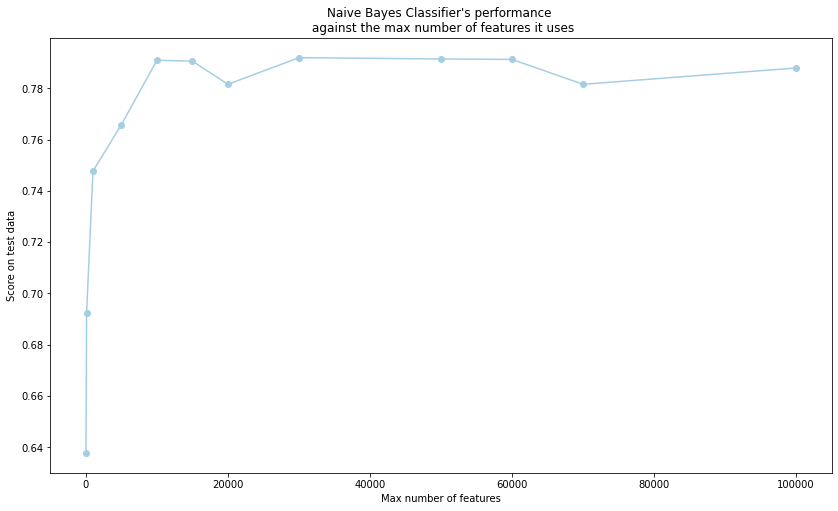

In [16]:
plt.figure(figsize = (14, 8))
plt.plot(max_features_values, scores, marker = 'o')
plt.title("Naive Bayes Classifier's performance \n against the max number of features it uses")
plt.xlabel("Max number of features")
plt.ylabel("Score on test data")
plt.show()

Plotting the model's score against the max number of features used shows an elbow at around 20,000. Which is in line with our expectations, based on the fact that humans have a use a limited vocabulary on a daily basis. 

#### Exploring how the classifier's performance changes when we build it using bigrams 


Instead of using single words as features for our model like we did in the previous section, we will built a model using bigrams. We will start by building a bigram with no restrictions on max feature number, and then we'll explore how the model performs with a lower max feature number.

In [17]:
no_digit_corpus = data['no_digit_essays']
bigram_vectorizer = CountVectorizer(stop_words = "english", ngram_range = (2,2))
X = bigram_vectorizer.fit_transform(no_digit_corpus)

train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size = 0.2)

classifier = MultinomialNB()
classifier.fit(train_data, train_labels)

feature_names = bigram_vectorizer.get_feature_names()
print("Number of features: ", len(feature_names))

print("No digits model's score on the : ")
print(" -  Training data: ", classifier.score(train_data, train_labels))
print(" -  Test data: ", classifier.score(test_data, test_labels))

Number of features:  3074274
No digits model's score on the : 
 -  Training data:  0.9996233048719236
 -  Test data:  0.7395379979912956


Our NB classifier using bigrams scores around 0.73 on the validation data. The model has over 3,000,000 features! Let's see how the model performs with a limited number of features.

In [18]:
no_digit_corpus = data['no_digit_essays']

max_features_values = [10, 100, 1000, 5000, 10000, 15000, 20000, 30000, 50000, 60000, 70000, 100000]
scores = []


for value in max_features_values:
    no_digits_vectorizer = CountVectorizer(stop_words = "english", max_features = value, ngram_range = (2,2))
    X = no_digits_vectorizer.fit_transform(no_digit_corpus)
    
    train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size = 0.2)
    
    classifier = MultinomialNB()
    classifier.fit(train_data, train_labels)
    
    scores.append(classifier.score(test_data, test_labels))

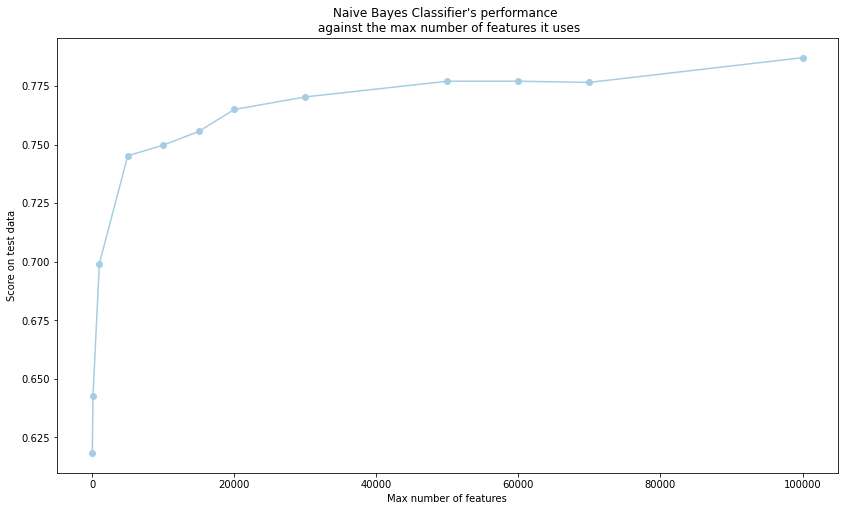

In [19]:
plt.figure(figsize = (14, 8))
plt.plot(max_features_values, scores, marker = 'o')
plt.title("Naive Bayes Classifier's performance \n against the max number of features it uses")
plt.xlabel("Max number of features")
plt.ylabel("Score on test data")
plt.show()

Similarly to unigram classifiers, plotting the bigram classifiers' score against the max number of features used shows an elbow. For bigram classifiers, the elbow is located around max_features = 35,000. Also, the model performed better when we restricted it's max_features to values below 100,000 compared to when it was built with no restrictions on max_features - which is probably due to overfitting in the latter case.

#### Appendix

The OkCupid dataset can be found on [Github](https://github.com/rudeboybert/JSE_OkCupid).
Permission to use this data set was explicitly granted by OkCupid.
Usernames are not included.